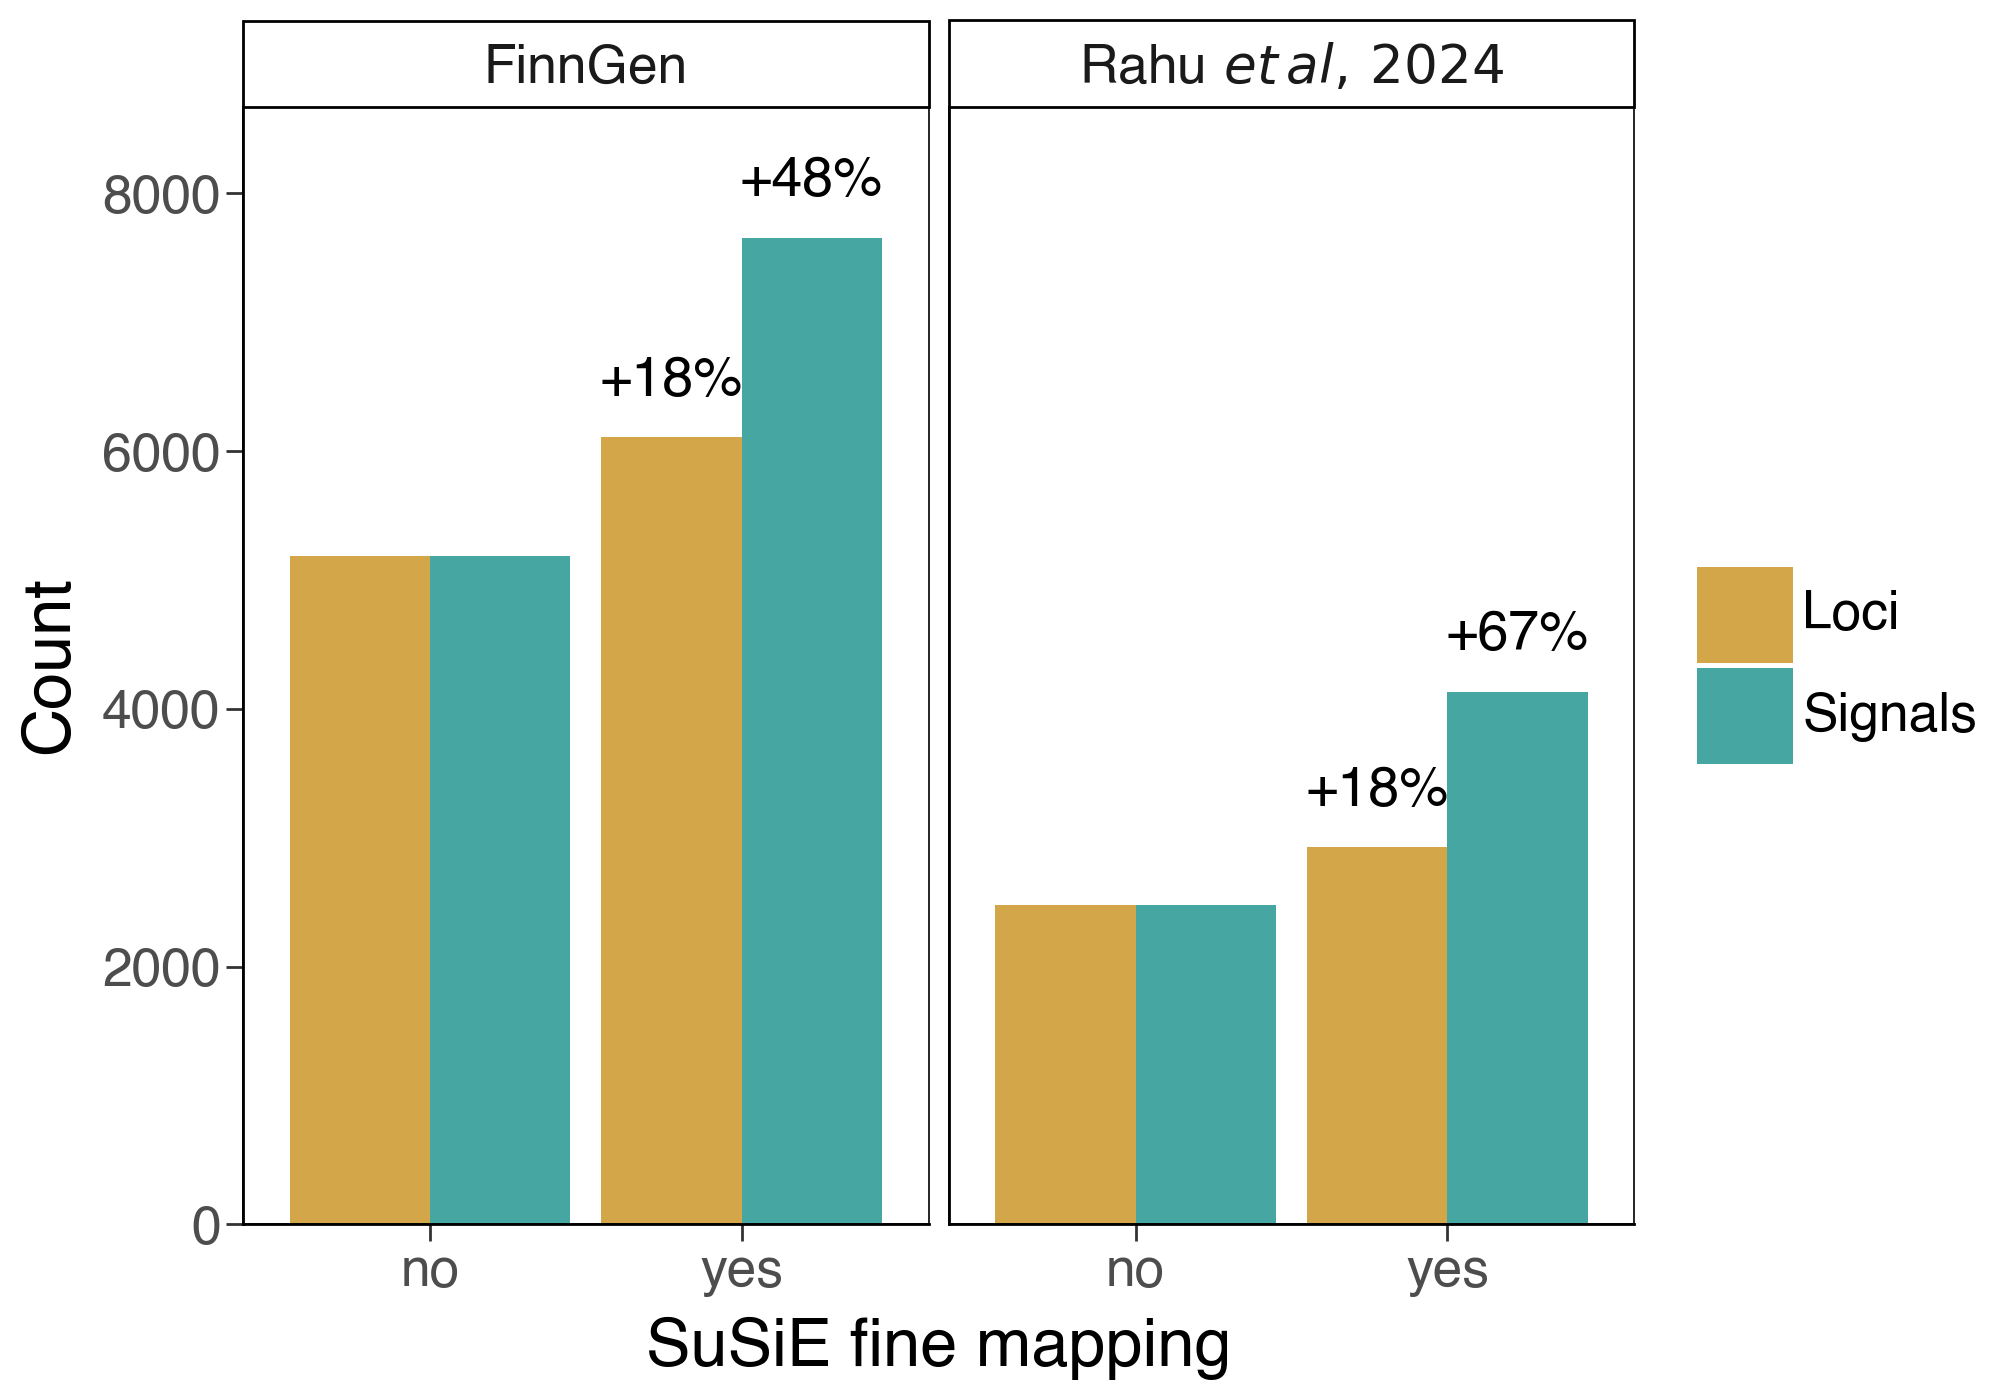

In [37]:
import pandas as pd
from plotnine import *

data = {
    'met_abfs': [2479, 2479],
    'met_lbfs': [4134, 2925],
    'finngen_abf': [5188, 5188],
    'finngen_lbf': [7656, 6109],
}

rows = [
    (r'Rahu$\ \mathit{et\,al},\, 2024$','no','Loci', data['met_abfs'][0]),
    (r'Rahu$\ \mathit{et\,al},\, 2024$','no','Signals', data['met_abfs'][1]),
    (r'Rahu$\ \mathit{et\,al},\, 2024$','yes','Loci', data['met_lbfs'][1]),
    (r'Rahu$\ \mathit{et\,al},\, 2024$','yes','Signals',data['met_lbfs'][0]),
    ('FinnGen','no','Loci', data['finngen_abf'][0]),
    ('FinnGen','no','Signals', data['finngen_abf'][1]),
    ('FinnGen','yes','Loci', data['finngen_lbf'][1]),
    ('FinnGen','yes','Signals',data['finngen_lbf'][0]),
]

df = pd.DataFrame(rows, columns=['dataset','fine_map','type','count'])
df['fine_map'] = pd.Categorical(df['fine_map'], ['no','yes'], ordered=True)

base = df[(df.fine_map=='no') & (df.type=='Loci')].set_index('dataset')['count']
lab = df[df.fine_map=='yes'].copy()
lab['pct'] = ((lab['count'] - lab['dataset'].map(base)) / lab['dataset'].map(base) * 100).round().astype(int)
lab['label'] = '+' + lab['pct'].astype(str) + '%'
lab['ypos'] = lab['count'] + df['count'].max()*0.03

pdodge = position_dodge2(padding=0, width=0.9)

p = (
    ggplot(df, aes('fine_map', 'count', fill='type'))
    + geom_col(position=pdodge, width=0.9)
    + geom_text(aes('fine_map', 'ypos', label='label', group='type'),
                data=lab, position=pdodge, va='bottom', size=20)
    + facet_grid('. ~ dataset')
    + labs(x='SuSiE fine mapping', y='Count', fill='type')
    + scale_fill_manual(values=['#D4A64A', '#46A6A1'])
    + scale_y_continuous(expand=(0, 0, 0.1, 0))
    + theme_classic(base_size=24)
    + theme(
        figure_size=(10, 7),
        panel_border=element_rect(color='black', fill=None, size=0.6),
        strip_background=element_rect(fill='white', color='black'),
        legend_title=element_blank()  
    )

)
p


In [38]:
from plotnine import ggsave

ggsave(p, "../figures/figure_4A.pdf")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 7 in image.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figure_4A.pdf
